In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


In [92]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [93]:
pd.set_option('display.max_colwidth', 120)
data=pd.read_csv("SMSSpamCollection", sep='\t', header=None)
data.columns=['label','msg']
data.head(8)

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std t...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX...
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Calle...


In [94]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [95]:
def remove_punctuation(txt):
    txt_nopunct ="".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [96]:
data['msg_clean']=data['msg'].apply(lambda x: remove_punctuation(x))
data.head(12)

,label,msg,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std t...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX...,FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std c...
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Calle...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertune for all Callers P...
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 0906170146...,WINNER As a valued network customer you have been selected to receivea £900 prize reward To claim call 09061701461 C...
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call Th...,Had your mobile 11 months or more U R entitled to Update to the latest colour mobiles with camera for Free Call The ...


In [97]:
import re
def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

In [98]:
import re
def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

data['msg_clean_tokenized'] = data['msg_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

,label,msg,msg_clean,msg_clean_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amor..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std t...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


#### Remove stop words:

In [99]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [100]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

In [101]:
data['msg_no_sw'] = data ['msg_clean_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,label,msg,msg_clean,msg_clean_tokenized,msg_no_sw
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amor...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std t...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionst..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


#### Stemming: Porter stemmer

In [102]:
from nltk.stem import PorterStemmer

In [103]:
ps = PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [104]:
print((ps.stem('university')), (ps.stem('universe')), (ps.stem('universal')))

univers univers univers


In [105]:
pd.set_option('display.max_colwidth', 100)

In [106]:
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

In [107]:
data['msg_stemmed']=data['msg_no_sw'].apply(lambda x: stemming(x))
data.head()

,label,msg,msg_clean,msg_clean_tokenized,msg_no_sw,msg_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


In [108]:
import nltk

In [109]:
wn=nltk.WordNetLemmatizer()


In [110]:
wn.lemmatize("Available")

'Available'

Read raw text

In [111]:
def lemmatization (token_text):
    text=[wn.lemmatize(word) for word in token_text]
    return text

In [112]:
data['msg_lemmatized']=data['msg_no_sw'].apply(lambda x: lemmatization(x))
data.head(9)

,label,msg,msg_clean,msg_clean_tokenized,msg_no_sw,msg_stemmed,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it s...,"[freemsg, hey, there, darling, its, been, 3, weeks, now, and, no, word, back, id, like, some, fu...","[freemsg, hey, darling, 3, weeks, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send...","[freemsg, hey, darl, 3, week, word, back, id, like, fun, still, tb, ok, xxx, std, chg, send, 150...","[freemsg, hey, darling, 3, week, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send,..."
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...,"[as, per, your, request, melle, melle, oru, minnaminunginte, nurungu, vettam, has, been, set, as...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,WINNER As a valued network customer you have been selected to receivea £900 

In [113]:
def clean_text(text):
    text="".join([c for c in text if c not in string.punctuation])
    tokens=re.split('\W+', text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

TFIDF Vectorizer

In [114]:
data_sample = data[0:10]
tfidf2 =TfidfVectorizer(analyzer=clean_text)

X = tfidf2.fit_transform(data_sample['msg'])

print(X.shape)


(10, 129)


In [115]:
df=pd.DataFrame(X.toarray(), columns = tfidf2.get_feature_names())
df.head(10)

c:\users\jakub\desktop\pythonprecinok\nltk\env\nltk\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,08002986030,08452810075over18,09061701461,11,12,150,2,2005,21st,3,...,vettam,wat,week,wif,win,winner,wkli,word,world,xxx
0,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.25,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.25,0.00000
1,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00,0.00000,0.435368,0.000000,0.00000,0.000000,0.00000,0.00,0.00000
2,0.000000,0.193446,0.00000,0.000000,0.00000,0.00000,0.193446,0.193446,0.193446,0.00000,...,0.000000,0.00,0.00000,0.000000,0.193446,0.00000,0.193446,0.00000,0.00,0.00000
3,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00,0.00000
4,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00,0.00000
5,0.000000,0.000000,0.00000,0.000000,0.00000,0.23284,0.000000,0.000000,0.000000,0.23284,...,0.000000,0.00,0.23284,0.000000,0.000000,0.00000,0.000000,0.23284,0.00,0.23284
6,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00,0.00000
7,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.219673,0.00,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00,0.00000
8,0.000000,0.000000,0.21594,0.000000,0.21594,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00,0.00000,0.000000,0.000000,0.21594,0.000000,0.00000,0.00,0.00000
9,0.188423,0.000000,0.00000,0.188423,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00,0.00000


## Feature engineering! 

In [116]:
import pandas as pd
data = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


## Create Feature:message Length 

In [117]:
data['msg_len'] = data['msg'].apply(lambda x: len(x))
data.head()

,label,msg,msg_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


## Create Feature: punctation usage

In [118]:
import string
def punctuation_count(txt):
    count = sum([1 for c in txt if c in string.punctuation])
    return 100*count/len(txt)
data['punctuation_%'] = data['msg'].apply(lambda x: punctuation_count (x))
data.head(10)

,label,msg,msg_len,punctuation_%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,3.278689
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,147,5.442177
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77,2.597403
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,160,3.750000
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,157,3.821656
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,154,1.298701


## New feature evaluation

In [119]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

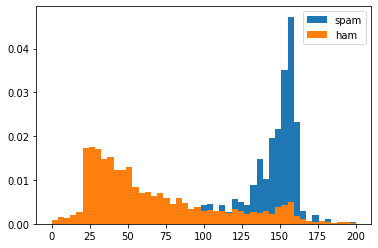

In [120]:

bins = np.linspace(0, 200, 50)
pyplot.hist(data[data['label'] == 'spam']['msg_len'], bins, label='spam', density=True) 
pyplot.hist(data[data['label'] == 'ham']['msg_len'], bins, label='ham', density=True) 
pyplot.legend(loc='upper right')
pyplot.show()

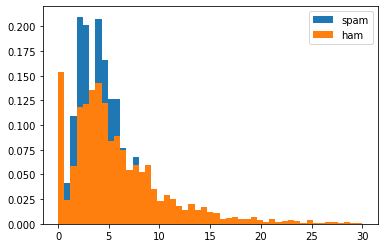

In [121]:

bins = np.linspace(0, 30, 50)
pyplot.hist(data[data['label'] == 'spam']['punctuation_%'], bins, label='spam',density=True) 
pyplot.hist(data[data['label'] == 'ham']['punctuation_%'], bins, label='ham',density=True ) 
pyplot.legend(loc='upper right')
pyplot.show()

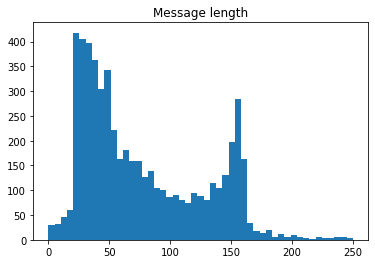

In [122]:
bins = np.linspace(0, 250, 50)
pyplot.hist(data['msg_len'], bins, ) 
pyplot.title('Message length')
pyplot.show()

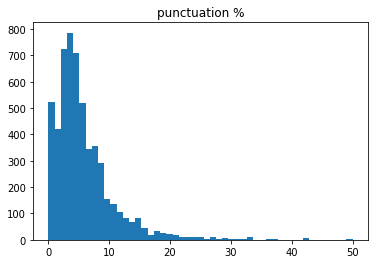

In [123]:
bins = np.linspace(0, 50, 50)
pyplot.hist(data['punctuation_%'], bins ) 
pyplot.title('punctuation %')
pyplot.show()

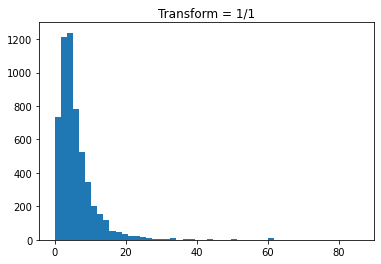

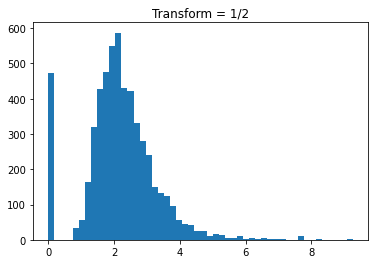

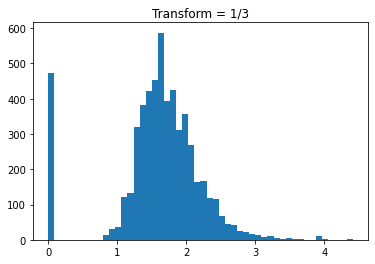

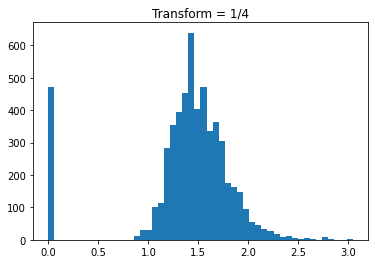

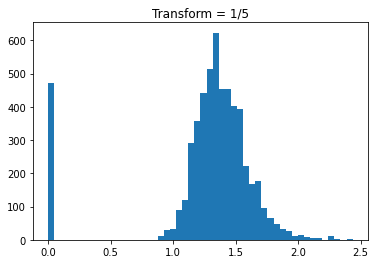

In [124]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punctuation_%'])**(1/i), bins = 50)
    pyplot.title(f'Transform = 1/{i}')
    pyplot.show()

## ML Classifier -Building random forrest classifier model

In [125]:
import pandas as pd
import nltk
import re
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [126]:
def punctuation_count(txt):
    count = sum([1 for c in txt if c in string.punctuation])
    return 100*count/len(txt)

data['msg_len'] = data['msg'].apply(lambda x: len(x))
data['punctuation_%']=data['msg'].apply(lambda x: punctuation_count(x))

In [127]:
def clean_text(text):
    text="".join([c for c in text if c not in string.punctuation])
    tokens=re.split('\W+', text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf.fit_transform(data['msg'])

In [129]:
X = pd.concat([data['msg_len'], data['punctuation_%'], pd.DataFrame(X_tfidf.toarray())], axis = 1)
X.head()

,msg_len,punctuation_%,0,1,2,3,4,5,6,7,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,8192
0,111,8.108108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,20.689655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155,3.870968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,12.244898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,3.278689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# RandomForestClassifier

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
kf = KFold (n_splits=5)
rf = RandomForestClassifier(n_jobs =-1)

cross_val_score(rf, X, data['label'], cv=kf, n_jobs=-1)

array([0.97578475, 0.9793722 , 0.97486535, 0.96409336, 0.97486535])

In [131]:
from sklearn.metrics import precision_recall_fscore_support as prfs_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.1)

rf = RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1)

rfmodel = rf.fit(X_train, y_train)

c:\users\jakub\desktop\pythonprecinok\nltk\env\nltk\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [132]:
sorted(zip(rfmodel.feature_importances_, X_train.columns), reverse=True)[0:35]

[(0.05499700789455886, 'msg_len'),
 (0.049867205782399344, 1820),
 (0.048995131635412095, 7424),
 (0.0376013586455621, 4840),
 (0.030334714386204092, 2049),
 (0.027473445527140556, 5781),
 (0.021313151705302204, 3160),
 (0.017858411726930222, 2189),
 (0.015369472323682645, 5125),
 (0.014725137969377265, 6809),
 (0.013780185429188537, 7250),
 (0.012900862206570255, 1372),
 (0.012681132789213167, 7092),
 (0.012411750295342642, 397),
 (0.012258447343611492, 7291),
 (0.0117891553363114, 392),
 (0.009527892357110173, 1899),
 (0.00887063208821337, 295),
 (0.008819051090710258, 6345),
 (0.008668869064439156, 3472),
 (0.008667240107757015, 7537),
 (0.008623040448146779, 375),
 (0.008345516022521973, 354),
 (0.008318081304277634, 294),
 (0.008253503623549258, 6108),
 (0.008069976390574433, 7866),
 (0.00802507978769424, 2643),
 (0.007852752919768441, 6046),
 (0.007393932623602514, 7668),
 (0.007281284656605338, 439),
 (0.006891549810852868, 690),
 (0.006428838390251475, 2222),
 (0.00610486380122

In [133]:
y_pred = rfmodel.predict(X_test)
precision, recall, fscore, support = prfs_score(y_test, y_pred, pos_label='spam', average='binary')

accuracy = (y_pred == y_test).sum()/len(y_pred)

print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'accuracy = {accuracy}')
print(f'fscore = {fscore}')

precision = 1.0
recall = 0.5238095238095238
accuracy = 0.946236559139785
fscore = 0.6875000000000001


c:\users\jakub\desktop\pythonprecinok\nltk\env\nltk\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
